## Kaggle Humpback Whale Identification

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

C:\Users\Naruhiko\Anaconda3\envs\carnd-term1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\Naruhiko\Anaconda3\envs\carnd-term1\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [3]:
os.listdir("./input/")

['sample_submission.csv', 'test', 'train', 'train.csv']

In [4]:
train_df = pd.read_csv("./input/train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [5]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("./input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [6]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    y = onehot_encoded

    return y, label_encoder

In [7]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [8]:
y, label_encoder = prepare_labels(train_df['Id'])

In [9]:
y.shape

(25361, 5005)

In [10]:
def top_5_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [11]:
from keras.optimizers import adam
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))

model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))

model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(optimizer=adam(lr=0.001), loss='categorical_crossentropy',
              metrics=[categorical_accuracy, top_5_accuracy])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70688)             0         
_________________________________________________________________
rl (Dense)                   (None, 500)               35344500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [13]:
import gc
history = model.fit(X, y, epochs=100, batch_size=128, verbose=1)
gc.collect()

Epoch 1/100
25361/25361 [==============================] - 1486s 59ms/step - loss: 9.9752 - categorical_accuracy: 0.3788 - top_5_accuracy: 0.9918
Epoch 2/100
25361/25361 [==============================] - 1481s 58ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 3/100
25361/25361 [==============================] - 1498s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 4/100
25361/25361 [==============================] - 1497s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 5/100
25361/25361 [==============================] - 1497s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 6/100
25361/25361 [==============================] - 1508s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 7/100
25361/25361 [==============================] - 1493s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - t

25361/25361 [==============================] - 1511s 60ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 57/100
25361/25361 [==============================] - 1484s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 58/100
25361/25361 [==============================] - 1485s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 59/100
25361/25361 [==============================] - 1498s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 60/100
25361/25361 [==============================] - 1503s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 61/100
25361/25361 [==============================] - 1488s 59ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_accuracy: 1.0000
Epoch 62/100
25361/25361 [==============================] - 1514s 60ms/step - loss: 9.9762 - categorical_accuracy: 0.3811 - top_5_a

0

In [14]:
model.save('./working/aug_model.hdf5')

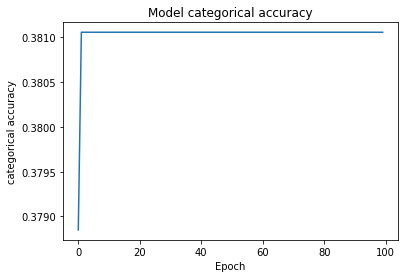

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.title('Model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.show()

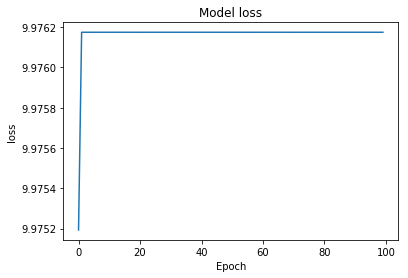

In [16]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [18]:
test = os.listdir("./input/test/")
print(len(test))

7960


In [19]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [20]:
X = prepareImages(test_df, test_df.shape[0], "test")
X /= 255

Preparing images
Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [21]:
predictions = model.predict(np.array(X), verbose=1)

7960/7960 [==============================] - 136s 17ms/step


In [22]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [23]:
test_df.head(10)
test_df.to_csv('submission_24.csv', index=False)